In [2]:

import cv2 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

Code for Figure 2A and 2B - Video preprocessing. 

In [ ]:
# cap = cv2.VideoCapture('videos/bot04.avi')
# frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# print(frame_count)
# # Get frame width and height
# frame_width = int(cap.get(3))
# frame_height = int(cap.get(4))

# success,frame = cap.read()

# # Extract frames
# frame_mat = np.zeros(shape=(frame_height, frame_width, frame_count))
# frame_idx = 0# Read the entire file until it is completed 

# while success: 
    
#     # Convert frame to grayscale if it's not already
#     if len(frame.shape) == 3:
#         gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     else:
#         gray_frame = frame
    
#     frame_mat[:,:,frame_idx] = gray_frame
#     frame_idx+=1
    
#     success,frame = cap.read()

In [3]:
# Extract frames from video
vidcap = cv2.VideoCapture('videos/bot04.avi')
success,image = vidcap.read()
frame_count = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))

frame_mat = np.zeros(shape=(image.shape[0],image.shape[1],frame_count))

frame_idx = 0
while success:
    frame_mat[:,:,frame_idx] = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    frame_idx+=1
    success,image = vidcap.read()

In [4]:
# get the average calcium intensity in each frame 
print(frame_mat.shape)
avg_signal = np.mean(frame_mat, axis=0)
print(avg_signal.shape)
avg_signal = np.mean(avg_signal, axis=0)
avg_signal_zscore = zscore(avg_signal)
print(avg_signal_zscore.shape)

print(avg_signal[:5])
print(avg_signal_zscore[:5])

(1460, 1920, 578)
(1920, 578)
(578,)
[22.51666203 23.10847032 23.21882028 23.22761059 23.16254174]
[1.90292213 2.11596418 2.1556885  2.15885288 2.13542908]


In [5]:
before_count = 245
before_start, before_stop = 0,before_count-1 # before 
after_count = 279
after_start, after_stop = frame_count-after_count-1, frame_count-1

print('frames extracted =', frame_count-(before_count+after_count))

frames extracted = 54


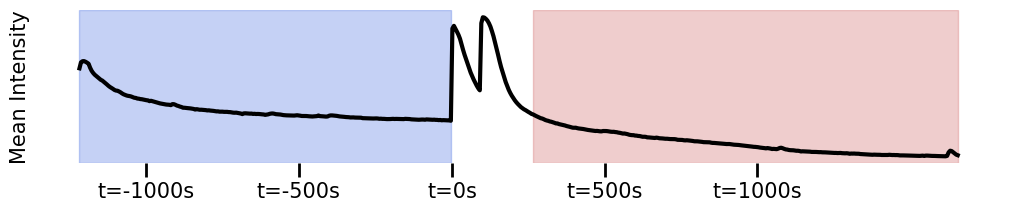

In [17]:
fig, ax = plt.subplots(1,1, layout='constrained', figsize=(10,2))
plt.axvspan(xmin=before_start,xmax=before_stop,color='royalblue', alpha=0.3)
plt.axvspan(xmin=after_start,xmax=after_stop,color='indianred', alpha=0.3
            , edgecolor=None)
ax.plot(np.arange(len(avg_signal_zscore)), avg_signal_zscore,c='k',linewidth=3)

# Annotations
# plt.annotate('before', (0,0),color='tab:blue')

# Hide axes
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks([]) # hide y ticks and tick labels

# plot labels
ax.set_xticks([before_stop-200,before_stop-100,before_stop+1,before_stop+1+100,before_stop+1+200])
ax.xaxis.set_tick_params(width=2, length=10)
ax.set_xticklabels(['t=-1000s', 't=-500s', 't=0s', 't=500s', 't=1000s'],fontsize=15)

ax.set_ylabel('Mean Intensity', fontsize=15)
plt.savefig('../../Desktop/mean_intensity.png', dpi=500, bbox_inches='tight', transparent=True)

In [52]:
fig_width = 800 # for cropping
fig_height = 800 # for cropping

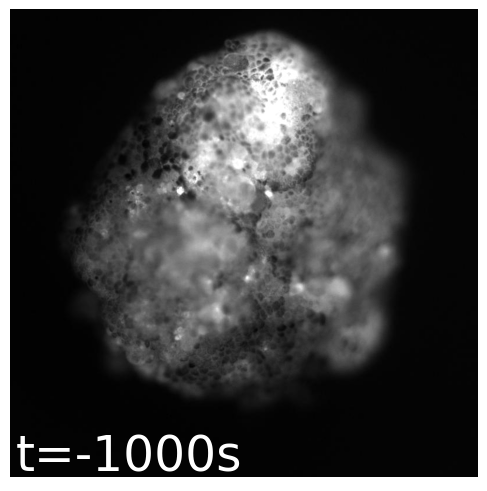

In [53]:
fig,ax = plt.subplots(1,1, layout='constrained')
# ax.imshow(frame_mat[:,:,before_stop+1+100],cmap='gray')
rstart = 300
cstart = 500
ax.imshow(frame_mat[rstart:rstart+fig_height,cstart:cstart+fig_width,before_stop-200],cmap='gray')
plt.axis('off')
ax.annotate('t=-1000s', (10,790), c='white', fontsize=35)
plt.savefig('../../Desktop/botimage.png', dpi=300, bbox_inches='tight')
plt.show()

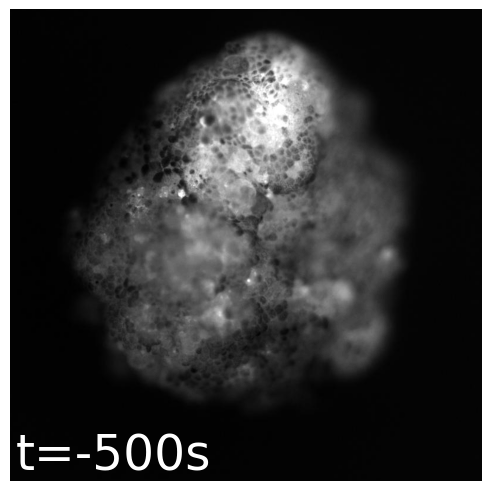

In [60]:
fig,ax = plt.subplots(1,1, layout='constrained')
# ax.imshow(frame_mat[:,:,before_stop+1+100],cmap='gray')
rstart = 300
cstart = 500
ax.imshow(frame_mat[rstart:rstart+fig_height,cstart:cstart+fig_width,before_stop-100],cmap='gray')
plt.axis('off')
ax.annotate('t=-500s', (10,780), c='white', fontsize=35)
plt.savefig('../../Desktop/botimage.png', dpi=300, bbox_inches='tight')
plt.show()

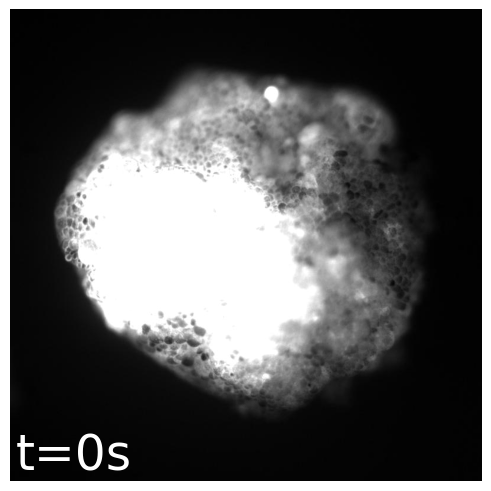

In [62]:
fig,ax = plt.subplots(1,1, layout='constrained')
# ax.imshow(frame_mat[:,:,before_stop+1],cmap='gray')
rstart = 400
cstart = 600
ax.imshow(frame_mat[rstart:rstart+fig_height,cstart:cstart+fig_width,before_stop+1],cmap='gray')
plt.axis('off')
ax.annotate('t=0s', (10,780), c='white', fontsize=35)
plt.savefig('../../Desktop/botimage.png', dpi=300, bbox_inches='tight')
plt.show()

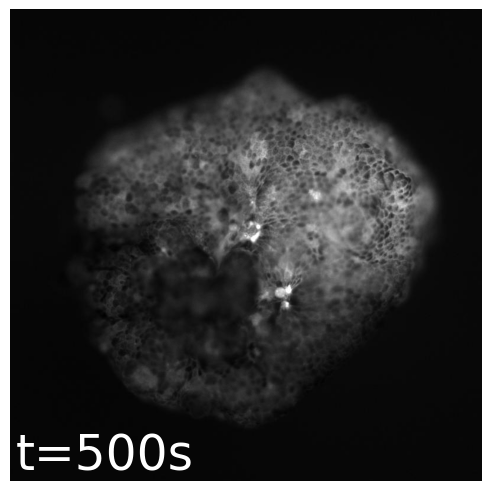

In [65]:
fig,ax = plt.subplots(1,1, layout='constrained')
# ax.imshow(frame_mat[:,:,before_stop+1+100],cmap='gray')
rstart = 300
cstart = 400
ax.imshow(frame_mat[rstart:rstart+fig_height,cstart:cstart+fig_width,before_stop+1+100],cmap='gray')
ax.annotate('t=500s', (10,780), c='white', fontsize=35)
plt.axis('off')
plt.savefig('../../Desktop/botimage.png', dpi=300, bbox_inches='tight')
plt.show()

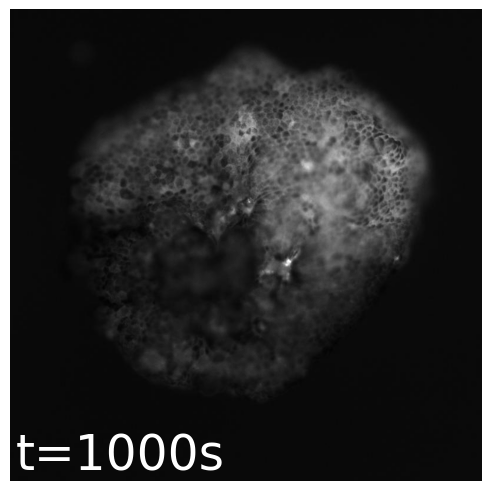

In [72]:
fig,ax = plt.subplots(1,1, layout='constrained')
# ax.imshow(frame_mat[:,:,after_start+200],cmap='gray')
rstart = 400
cstart = 450
ax.imshow(frame_mat[rstart:rstart+fig_height,cstart:cstart+fig_width,before_stop+1+200],cmap='gray')
ax.annotate('t=1000s', (10,780), c='white', fontsize=35)
plt.axis('off')
plt.savefig('../../Desktop/botimage.png', dpi=300, bbox_inches='tight')
plt.show()